# **Project 3 Code and Visualizations**

The following code provides the workflow, functions, analysis, and insights into Project 3 for group Ernst Engel

Project Members: Allison Nguyen, Fari Santoso, Katy Qin, Johann Dicken, Shrija Malla, Avani Agarwal 


# Table of Contents

- **Deliverable [A] - Population of Interest**
- **Data Setup**
- **Data Filtering**
- **Estimation**

- **Gamma Visualizations**

- **Sorted Gamma Visualizations**

- **Deliverable [B] - Nutritional Content**

- **Deliverable [B] - Nutritional Adaquacy**



To run this code you well need the `CFEDemands` python
module.  You may have this already, but if not it  can be installed with a simple:



In [1]:
!pip install -r requirements.txt

  Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached ConsumerDemands-0.4.3.dev0-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached eep153_tools-0.12.4-py2.py3-none-any.whl.metadata (363 bytes)
  Using cached python_gnupg-0.5.4-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl (45 kB)
Using cached ConsumerDemands-0.4.3.dev0-py2.py3-none-any.whl (12 kB)
Using cached eep153_tools-0.12.4-py2.py3-none-any.whl (4.9 kB)
Using cached python_gnupg-0.5.4-py2.py3-none-any.whl (21 kB)
Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl (27 kB)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
  Attempting uninstall: gspread_pandas
    Found existing installation: gspread-pandas 2.2.3
    Uninstalling gspread-pandas-2.2.3:
      Successfully uninstalled gspread-pandas-2

**Deliverable [A] - Population of Interest**

Our primary population of interest is the elderly population, defined as those above the age of 50 in 4 African countries: Uganda, Tanzania, Mali, and Senegal

**Data Setup**



In [2]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

In [3]:
Uganda_Data = '1yFWlP5N7Aowaj6t2roRSFFUC50aFD-RLBGfzGtqLl0w'
Tanzania_Data = '1tlNUxe2hY2DAOsv6u7R7yC_CiBcr05cXXQiRWBlEHEo'
Senegal_Data = '1cCszXB2Irc1Dp9zyIQgeu4OVWy9ZqvJbTielK8h9PLk'
Mali_Data = '1FnbKj5gwoAQb0QSunBQmyExHwaiLEAdAFCxL59SWLyg'

In [4]:
mali_sheet_names = {
        "expenditures": "Food Expenditures (2018-19)",
        "prices": "Food Prices (2018-19)",
        "household": "Household Characteristics"
    }

In [5]:
def load_country_data(sheet_key, sheet_names = None):

    if sheet_names == None:
        sheet_names = {
        "expenditures": "Food Expenditures (2019-20)",
        "prices": "Food Prices (2019-20)",
        "household": "Household Characteristics"
        }

    # Read expenditures
    x = read_sheets(sheet_key, sheet=sheet_names["expenditures"])
    x = x.set_index(['i','t','m','j']).squeeze()

    # Read prices
    p = read_sheets(sheet_key, sheet=sheet_names["prices"]).set_index(['t','m','j','u'])
    p = p.groupby(['t','m','j','u']).median()  # Median price
    p.index = p.index.set_levels(p.index.levels[-1].str.lower(), level='u')

    p = p.xs('kg', level='u').squeeze().unstack('j')  # Just kg prices
    common_goods = p.columns.intersection(x.index.levels[-1])
    p = p[common_goods].T


    # Read household characteristics
    d = read_sheets(sheet_key, sheet=sheet_names["household"])
    d.columns.name = 'k'
    d = d.replace(np.nan, 0)  # Fill blanks with zero

    #filter data
    

    # Process expenditures
    x = x.T.groupby(['i','t','m','j']).sum()
    x = x.replace(0, np.nan)  # Replace zero with missing
    y = np.log(x)  # Take logs

    d.set_index(['i','t','m'], inplace=True)

    return x, y, p, d


In [6]:
x_uganda, y_uganda, p_uganda, d_uganda = load_country_data(Uganda_Data)
x_tanzania, y_tanzania, p_tanzania, d_tanzania = load_country_data(Tanzania_Data)
x_mali, y_mali, p_mali, d_mali = load_country_data(Mali_Data, sheet_names = mali_sheet_names)
x_senegal, y_senegal, p_senegal, d_senegal = load_country_data(Senegal_Data)
d_senegal = d_senegal.drop(columns = ["men", "women", "girls", "boys"])

Here are household characteristics $d$ of each of the 4 countries



In [7]:
d_uganda.head(2)

,,k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
0007d1f1449242feb5a25429644fb991,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.609438
0010cbae3cea4ec9831f6cd92b02dc16,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.098612


In [8]:
d_tanzania.head(2)

k                                Males 00-03  Females 00-03  Males 04-08  \
i        t       m                                                         
0001-001 2012-13 Mainland Rural            0              0            0   
         2014-15 Mainland Rural            0              0            0   

k                                Females 04-08  Males 09-13  Females 09-13  \
i        t       m                                                           
0001-001 2012-13 Mainland Rural              0            0              0   
         2014-15 Mainland Rural              0            0              0   

k                                Males 14-18  Females 14-18  Males 19-30  \
i        t       m                                                         
0001-001 2012-13 Mainland Rural            0              0            4   
         2014-15 Mainland Rural            0              0            1   

k                                Females 19-30  Males 31-50  Females 31-50  \
i        t       m                                                           
0001-001 2012-13 Mainland Rural              0            0              0   
         2014-15 Mainland Rural              0            1              0   

k                                Males 51-99  Females 51-99  log HSize  
i        t       m                                                      
0001-001 2012-13 Mainland Rural            2              2   2.079442  
         2014-15 Mainland Rural            1              1   1.386294

In [9]:
d_mali.head(2)

,,k,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,M NA,log HSize,F NA
i,t,m,,,,,,,,,,,,,,,,,
1001,2017-18,Kayes,0.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.197225,0.0
1002,2017-18,Kayes,3.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.484907,0.0


In [10]:
d_senegal.head(2)

,,k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
11011,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
110110,2018,ziguinchor,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1.386294


# Data Filtering
Our population concerns households with at least one elderly male and female. Based on the data we define elderly as aged 51 and older. 

In [11]:
def filter_data (df, on = ["Females 51-99", "Males 51-99"]):
    df_filtered = df[(df[on[0]] >= 1) | (df[on[1]] >= 1)]
    cols_to_check = [col for col in df.columns if col not in on and "log" not in col.lower()]

    others_zero = (df_filtered[cols_to_check] == 0).all(axis=1)
    df_filtered = df_filtered[others_zero]
    return df_filtered

In [12]:
d_uganda_filter = filter_data(d_uganda)
d_tanzania_filter = filter_data(d_tanzania)
d_senegal_filter = filter_data(d_senegal)
d_mali_filter = filter_data(d_mali, on = ["F 51+", "M 51+"])

In [13]:
filter_data(d_senegal)

,,k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
11011,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
111,2018,dakar,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.693147
11104,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000
111611,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
11169,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,2019,dakar,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
2881,2019,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
2921,2019,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.693147


Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [14]:
y_uganda.head()

i                                 t        m         j              
0007d1f1449242feb5a25429644fb991  2019-20  Northern  Beans (dry)         9.392662
                                                     Beef               10.239960
                                                     Beer                9.169518
                                                     Cabbage (green)     6.907755
                                                     Cassava (fresh)     8.294050
Name: Expenditure, dtype: float64

**Estimation**



Let $y_{i}^j$ be log expenditures on food $j$ by household $i$ at a particular time.  We want to estimate a regression that takes the form
$$
      y^j_{i} = A^j(p) + \gamma_j'd_i + \beta_j w_i + \zeta^j_i.
$$



In [15]:
from cfe import Regression

result_uganda = Regression(y=y_uganda,d=d_uganda)
result_tanzania = Regression(y=y_tanzania,d=d_tanzania)
result_senegal = Regression(y=y_senegal,d=d_senegal)
result_mali = Regression(y=y_mali,d=d_mali)

In [16]:
result_uganda.predicted_expenditures()

i                                 t        m         j                     
0007d1f1449242feb5a25429644fb991  2019-20  Northern  Avocado                    1836.603231
                                                     Beans (dry)                8530.391173
                                                     Beans (fresh)              4828.283261
                                                     Beef                      15788.755164
                                                     Bogoya                     4770.257706
                                                                                   ...     
ffec87c6ae87498f956723afe69266b9  2019-20  Eastern   Sweet Potatoes (fresh)     8625.903421
                                                     Tea (leaves)                218.108367
                                                     Tomatoes                   1543.016198
                                                     Waragi                     4677.821554
    

In [17]:
#%matplotlib inline
#df = pd.DataFrame({'y':y_uganda,'yhat':result_uganda.get_predicted_log_expenditures()})
#df.plot.scatter(x='yhat',y='y')

In [18]:
#ax = result_uganda.graph_beta()

In [19]:
#beta_uganda = result_uganda.get_beta()

In [20]:
gamma_uganda = result_uganda.get_gamma()[["Females 51-99", "Males 51-99"]]
gamma_tanzania = result_tanzania.get_gamma()[["Females 51-99", "Males 51-99"]]
gamma_mali = result_mali.get_gamma()[["F 51+", "M 51+"]]
gamma_senegal = result_senegal.get_gamma()[["Females 51-99", "Males 51-99"]]

# Estimation

In [21]:
d_uganda_filter = filter_data(d_uganda)
d_tanzania_filter = filter_data(d_tanzania)
d_senegal_filter = filter_data(d_senegal)
d_mali_filter = filter_data(d_mali, on = ["F 51+", "M 51+"])

# UGANDA
result_uganda = Regression(y=y_uganda,d=d_uganda)

# TANZANIA
result_tanzania = Regression(y=y_tanzania,d=d_tanzania)

# SENEGAL
result_senegal = Regression(y=y_senegal,d=d_senegal)

In [22]:
result_uganda.predicted_expenditures()
result_tanzania.predicted_expenditures()
result_senegal.predicted_expenditures()

i       t     m        j                                                                  
221     2019  dakar    Ail                                                                     166.089966
                       Arachides décortiquées ou pilées (noflaye)                              372.957008
                       Aubergine, Courge/Courgette                                             121.811631
                       Autre légumes frais n.d.a (y compris les fleurs blanches de bissap)     163.472423
                       Autres condiments (poivre etc.)                                         148.726142
                                                                                                 ...     
259812  2019  sedhiou  Thé                                                                     145.089684
                       Tomate fraîche                                                          135.855438
                       Viande de b__uf                       

<Axes: xlabel='yhat', ylabel='y'>

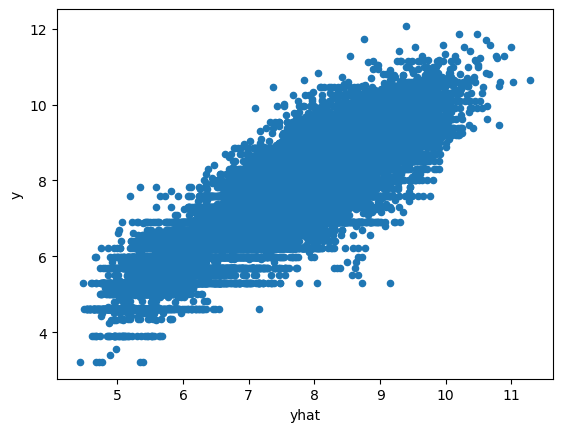

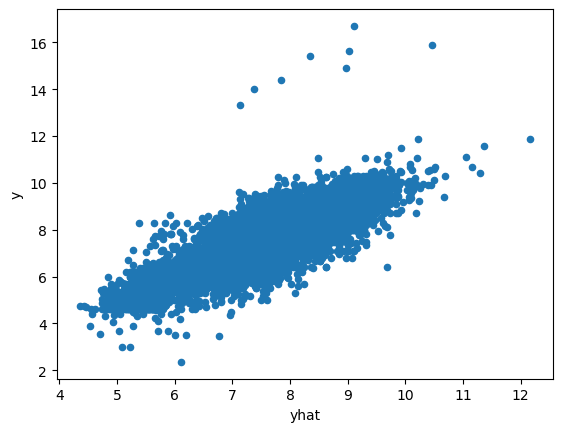

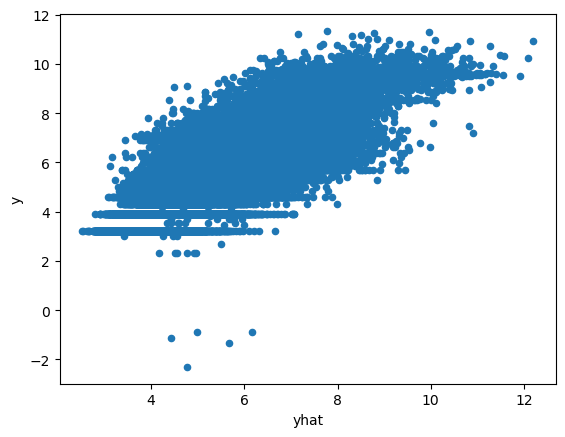

In [23]:
%matplotlib inline

# UGANDA
df_uganda = pd.DataFrame({'y':y_uganda,'yhat':result_uganda.get_predicted_log_expenditures()})
df_uganda.plot.scatter(x='yhat',y='y')

# TANZANIA
df_tanzania = pd.DataFrame({'y':y_tanzania,'yhat':result_tanzania.get_predicted_log_expenditures()})
df_tanzania.plot.scatter(x='yhat',y='y')

# SENEGAL
df_senegal = pd.DataFrame({'y':y_senegal,'yhat':result_senegal.get_predicted_log_expenditures()})
df_senegal.plot.scatter(x='yhat',y='y')

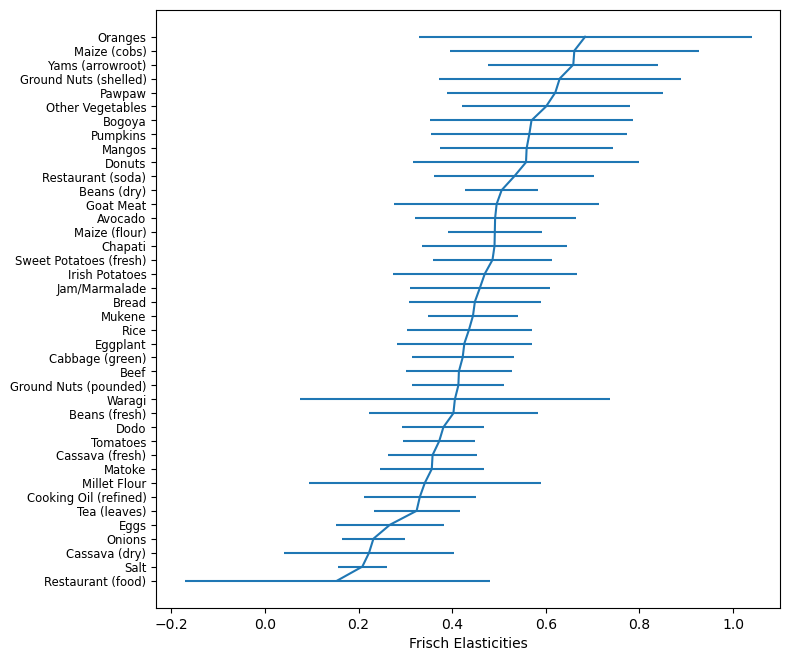

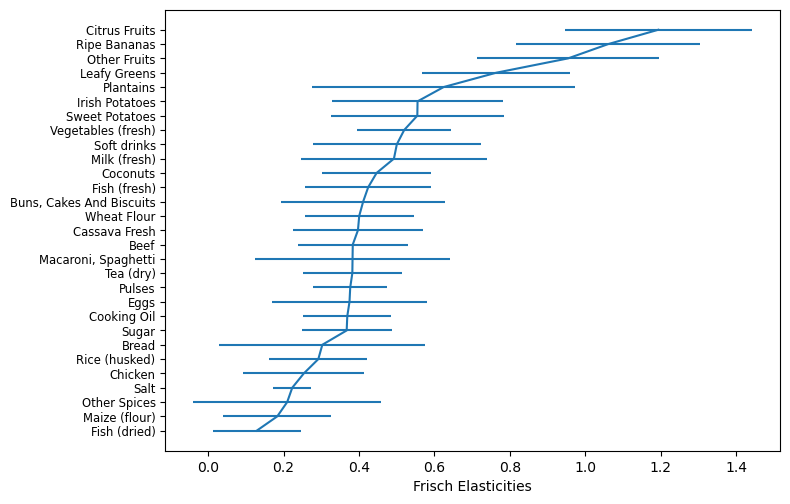

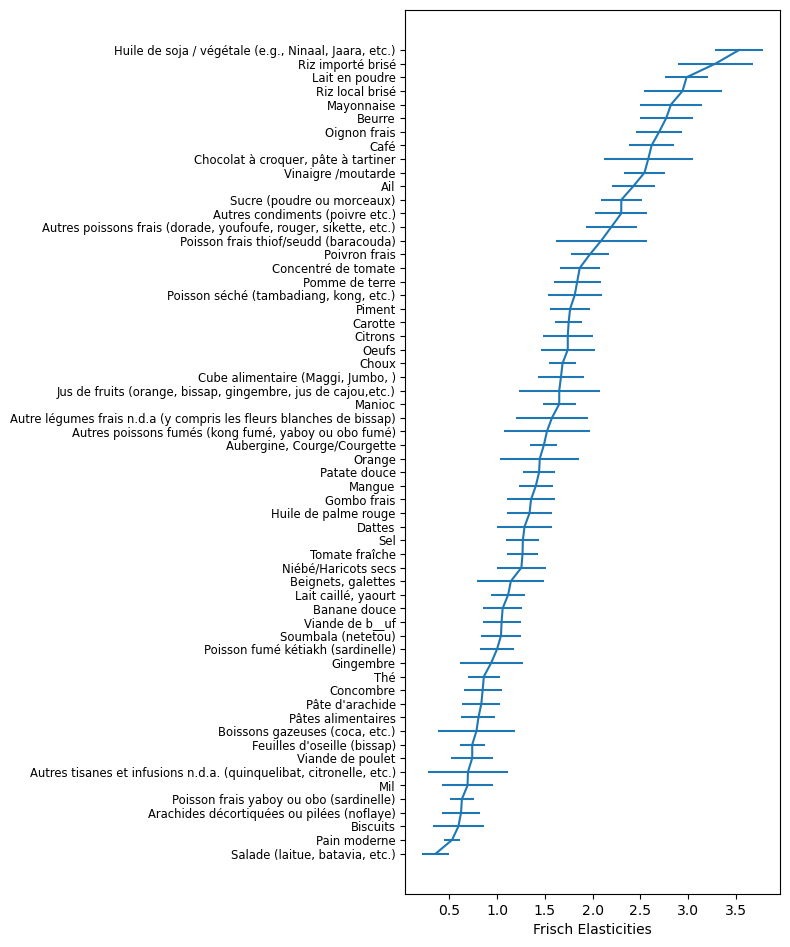

In [24]:
ax_uganda = result_uganda.graph_beta()
ax_tanzania = result_tanzania.graph_beta()
ax_senegal = result_senegal.graph_beta()

In [25]:
result_uganda.get_beta()
result_tanzania.get_beta()
result_senegal.get_beta()

j
Ail                                                                    2.426945
Arachides décortiquées ou pilées (noflaye)                             0.622090
Aubergine, Courge/Courgette                                            1.489921
Autre légumes frais n.d.a (y compris les fleurs blanches de bissap)    1.574516
Autres condiments (poivre etc.)                                        2.299873
Autres poissons frais (dorade, youfoufe, rouger, sikette, etc.)        2.195590
Autres poissons fumés (kong fumé, yaboy ou obo fumé)                   1.521768
Autres tisanes et infusions n.d.a. (quinquelibat, citronelle, etc.)    0.694651
Banane douce                                                           1.057845
Beignets, galettes                                                     1.144213
Beurre                                                                 2.771239
Biscuits                                                               0.594687
Boissons gazeuses (coca, etc.)        

<Axes: ylabel='Density'>

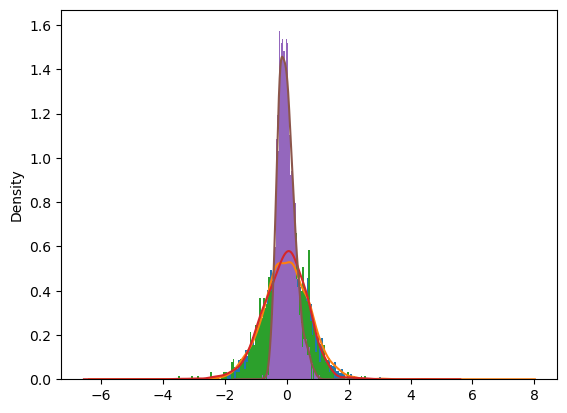

In [26]:
ax_uganda = result_uganda.get_w().plot.hist(bins=100,density=True)
result_uganda.get_w().plot.kde(ax=ax_uganda)

ax_tanzania = result_tanzania.get_w().plot.hist(bins=100,density=True)
result_tanzania.get_w().plot.kde(ax=ax_tanzania)

ax_senegal = result_senegal.get_w().plot.hist(bins=100,density=True)
result_senegal.get_w().plot.kde(ax=ax_senegal)

In [27]:
result_uganda.to_pickle('uganda_estimates.rgsn')
result_tanzania.to_pickle('tanzania_estimates.rgsn')
result_senegal.to_pickle('senegal_estimates.rgsn')

In [28]:
xhat_uganda = result_uganda.predicted_expenditures()
# Total food expenditures per household
xbar_uganda = xhat_uganda.groupby(['i','t','m']).sum()
# Reference budget
xref_uganda = xbar_uganda.quantile(0.5)  # Household at 0.5 quantile is median
#xref

xhat_tanzania = result_tanzania.predicted_expenditures()
# Total food expenditures per household
xbar_tanzania = xhat_tanzania.groupby(['i','t','m']).sum()
# Reference budget
xref_tanzania = xbar_tanzania.quantile(0.5)  # Household at 0.5 quantile is median

xhat_senegal = result_senegal.predicted_expenditures()
# Total food expenditures per household
xbar_senegal = xhat_senegal.groupby(['i','t','m']).sum()
# Reference budget
xref_senegal = xbar_senegal.quantile(0.5)  # Household at 0.5 quantile is median

In [29]:
# UGANDA
xbar_by_product_uganda = xhat_uganda.groupby(['j', 'i', 't', 'm']).sum()
# 3. Berechne den Median für jedes Produkt / Calculate the median for each product
xref_all_products_uganda = xbar_by_product_uganda.groupby('j').quantile(0.5)
xref_all_products_uganda

# TANZANIA
xbar_by_product_tanzania = xhat_tanzania.groupby(['j', 'i', 't', 'm']).sum()
# 3. Berechne den Median für jedes Produkt / Calculate the median for each product
xref_all_products_tanzania = xbar_by_product_tanzania.groupby('j').quantile(0.5)
xref_all_products_tanzania

# SENEGAL
xbar_by_product_senegal = xhat_senegal.groupby(['j', 'i', 't', 'm']).sum()
# 3. Berechne den Median für jedes Produkt / Calculate the median for each product
xref_all_products_senegal = xbar_by_product_senegal.groupby('j').quantile(0.5)
xref_all_products_senegal

j
Ail                                                                       76.322695
Arachides décortiquées ou pilées (noflaye)                               255.617919
Aubergine, Courge/Courgette                                              100.887485
Autre légumes frais n.d.a (y compris les fleurs blanches de bissap)       85.552324
Autres condiments (poivre etc.)                                           66.621211
Autres poissons frais (dorade, youfoufe, rouger, sikette, etc.)          965.977649
Autres poissons fumés (kong fumé, yaboy ou obo fumé)                     386.878065
Autres tisanes et infusions n.d.a. (quinquelibat, citronelle, etc.)      119.599552
Banane douce                                                             452.508800
Beignets, galettes                                                       195.375171
Beurre                                                                   462.207773
Biscuits                                                                 1

In [30]:
# UGANDA
# 1. Lade die Gamma-Koeffizienten / Load the gamma coefficients
gamma_uganda = result_uganda.get_gamma()
# 2. Extrahiere die Spalte "Males 51-99" / Extract the column "FEMales 51-99"
gamma_uganda_females = gamma_uganda['Females 51-99']
# 3. Multipliziere elementweise mit den Median-Ausgaben je Produkt / Multiply element by element by the median expenditure per product
# Stelle sicher, dass beide Series denselben Index haben (Produkte) / Ensure that both series have the same index (products)
result_product_ugandaf = gamma_uganda_females * xref_all_products_uganda[0]
# 4. Ergebnis anzeigen / Show result
#result_product

# MALES
gamma_uganda = result_uganda.get_gamma()
# 2. Extrahiere die Spalte "Males 51-99" / Extract the column "FEMales 51-99"
gamma_males_51_99 = gamma_uganda['Males 51-99']
# 3. Multipliziere elementweise mit den Median-Ausgaben je Produkt / Multiply element by element by the median expenditure per product
# Stelle sicher, dass beide Series denselben Index haben (Produkte) / Ensure that both series have the same index (products)
result_product_ugandam = gamma_males_51_99 * xref_all_products_uganda[0]

/tmp/ipykernel_60/1161846214.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result_product_ugandaf = gamma_uganda_females * xref_all_products_uganda[0]
/tmp/ipykernel_60/1161846214.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result_product_ugandam = gamma_males_51_99 * xref_all_products_uganda[0]


In [31]:
# TANZANIA

# Load the gamma coefficients
gamma_tanzania = result_tanzania.get_gamma()
# 2. Extrahiere die Spalte "Males 51-99" / Extract the column "FEMales 51-99"
gamma_tanzania_females = gamma_tanzania['Females 51-99']
# 3. Multipliziere elementweise mit den Median-Ausgaben je Produkt / Multiply element by element by the median expenditure per product
# Stelle sicher, dass beide Series denselben Index haben (Produkte) / Ensure that both series have the same index (products)
result_product_tanzaniaf = gamma_tanzania_females * xref_all_products_tanzania[0]
# 4. Ergebnis anzeigen / Show result
#result_product

# MALES
gamma_tanzania = result_tanzania.get_gamma()
# 2. Extrahiere die Spalte "Males 51-99" / Extract the column "FEMales 51-99"
gamma_tanzania_males = gamma_tanzania['Males 51-99']
# 3. Multipliziere elementweise mit den Median-Ausgaben je Produkt / Multiply element by element by the median expenditure per product
# Stelle sicher, dass beide Series denselben Index haben (Produkte) / Ensure that both series have the same index (products)
result_product_tanzaniam = gamma_tanzania_males * xref_all_products_tanzania[0]

/tmp/ipykernel_60/1671732096.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result_product_tanzaniaf = gamma_tanzania_females * xref_all_products_tanzania[0]
/tmp/ipykernel_60/1671732096.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result_product_tanzaniam = gamma_tanzania_males * xref_all_products_tanzania[0]


In [32]:
# SENEGAL

# Load the gamma coefficients
gamma_senegal = result_senegal.get_gamma()
# 2. Extrahiere die Spalte "Males 51-99" / Extract the column "FEMales 51-99"
gamma_senegal_females = gamma_senegal['Females 51-99']
# 3. Multipliziere elementweise mit den Median-Ausgaben je Produkt / Multiply element by element by the median expenditure per product
# Stelle sicher, dass beide Series denselben Index haben (Produkte) / Ensure that both series have the same index (products)
result_product_senegalf = gamma_senegal_females * xref_all_products_senegal[0]
# 4. Ergebnis anzeigen / Show result
#result_product

# MALES
gamma_senegal = result_senegal.get_gamma()
# 2. Extrahiere die Spalte "Males 51-99" / Extract the column "FEMales 51-99"
gamma_senegal_males = gamma_senegal['Males 51-99']
# 3. Multipliziere elementweise mit den Median-Ausgaben je Produkt / Multiply element by element by the median expenditure per product
# Stelle sicher, dass beide Series denselben Index haben (Produkte) / Ensure that both series have the same index (products)
result_product_senegalm = gamma_senegal_males * xref_all_products_senegal[0]

/tmp/ipykernel_60/2111468207.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result_product_senegalf = gamma_senegal_females * xref_all_products_senegal[0]
/tmp/ipykernel_60/2111468207.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result_product_senegalm = gamma_senegal_males * xref_all_products_senegal[0]


In [33]:
pbar_uganda = p_uganda.mean(axis=1)
pbar_uganda = pbar_uganda[result_uganda.beta.index] # Only use prices for goods we can estimate
# Replace missing prices with 1 (this is because they're best measured in expenditures)
pbar_uganda = pbar_uganda.replace(np.nan,1)

pbar_tanzania = p_tanzania.mean(axis=1)
pbar_tanzania = pbar_tanzania[result_tanzania.beta.index] # Only use prices for goods we can estimate
# Replace missing prices with 1 (this is because they're best measured in expenditures)
pbar_tanzania = pbar_tanzania.replace(np.nan,1)

pbar_senegal = p_senegal.mean(axis=1)
#pbar_senegal = pbar_senegal[result_senegal.beta.index] # Only use prices for goods we can estimate
# Replace missing prices with 1 (this is because they're best measured in expenditures)
pbar_senegal = pbar_senegal.replace(np.nan,1)

In [58]:
# FEMALES

consumption_uganda_f = result_product_ugandaf/pbar_uganda
consumption_uganda_f = consumption_uganda_f[abs(consumption_uganda_f) >= 0.05]
consumption_df_uganda_f = consumption_uganda_f.to_frame()
consumption_df_r_uganda_f = consumption_df_uganda_f.reset_index()
consumption_df_re_uganda_f = consumption_df_r_uganda_f.rename(columns={'j': 'Food', 0: 'Expenditure'})
consumption_df_re_uganda_f = consumption_df_re_uganda_f[consumption_df_re_uganda_f.Food != 'Restaurant (food)']

# TANZANIA
consumption_tanzania_f = result_product_tanzaniaf/pbar_tanzania
consumption_tanzania_f = consumption_tanzania_f[abs(consumption_tanzania_f) >= 0.05]
consumption_df_tanzania_f = consumption_tanzania_f.to_frame()
consumption_df_r_tanzania_f = consumption_df_tanzania_f.reset_index()
consumption_df_re_tanzania_f = consumption_df_r_tanzania_f.rename(columns={'j': 'Food', 0: 'Expenditure'})
consumption_df_re_tanzania_f = consumption_df_re_tanzania_f[consumption_df_re_tanzania_f.Food != 'Restaurant (food)']

# SENEGAL
consumption_senegal_f = result_product_senegalf/pbar_senegal
consumption_senegal_f = consumption_senegal_f[abs(consumption_senegal_f) >= 0.005]
consumption_df_senegal_f = consumption_senegal_f.to_frame()
consumption_df_r_senegal_f = consumption_df_senegal_f.reset_index()
consumption_df_re_senegal_f = consumption_df_r_senegal_f.rename(columns={'j': 'Food', 0: 'Expenditure'})
consumption_df_re_senegal_f = consumption_df_re_senegal_f[consumption_df_re_senegal_f.Food != 'Restaurant (food)']
consumption_df_re_senegal_f_no_vinegar = consumption_df_re_senegal_f.drop(consumption_df_re_senegal_f.index[26])

In [59]:
# MALES

consumption_uganda_m = result_product_ugandam/pbar_uganda
consumption_uganda_m = consumption_uganda_m[abs(consumption_uganda_m) >= 0.05]
consumption_df_uganda_m = consumption_uganda_m.to_frame()
consumption_df_r_uganda_m = consumption_df_uganda_m.reset_index()
consumption_df_re_uganda_m = consumption_df_r_uganda_m.rename(columns={'j': 'Food', 0: 'Expenditure'})
consumption_df_re_uganda_m = consumption_df_re_uganda_m[consumption_df_re_uganda_m.Food != 'Restaurant (food)']

# TANZANIA
consumption_tanzania_m = result_product_tanzaniam/pbar_tanzania
consumption_tanzania_m = consumption_tanzania_m[abs(consumption_tanzania_m) >= 0.05]
consumption_df_tanzania_m = consumption_tanzania_m.to_frame()
consumption_df_r_tanzania_m = consumption_df_tanzania_m.reset_index()
consumption_df_re_tanzania_m = consumption_df_r_tanzania_m.rename(columns={'j': 'Food', 0: 'Expenditure'})
consumption_df_re_tanzania_m = consumption_df_re_tanzania_m[consumption_df_re_tanzania_m.Food != 'Restaurant (food)']

# SENEGAL
consumption_senegal_m = result_product_senegalm/pbar_senegal
consumption_senegal_m = consumption_senegal_m[abs(consumption_senegal_m) >= 0.005]
consumption_df_senegal_m = consumption_senegal_m.to_frame()
consumption_df_r_senegal_m = consumption_df_senegal_m.reset_index()
consumption_df_re_senegal_m = consumption_df_r_senegal_m.rename(columns={'j': 'Food', 0: 'Expenditure'})
consumption_df_re_senegal_m = consumption_df_re_senegal_m[consumption_df_re_senegal_m.Food != 'Restaurant (food)']
consumption_df_re_senegal_m_no_vinegar = consumption_df_re_senegal_m.drop(consumption_df_re_senegal_m.index[25])

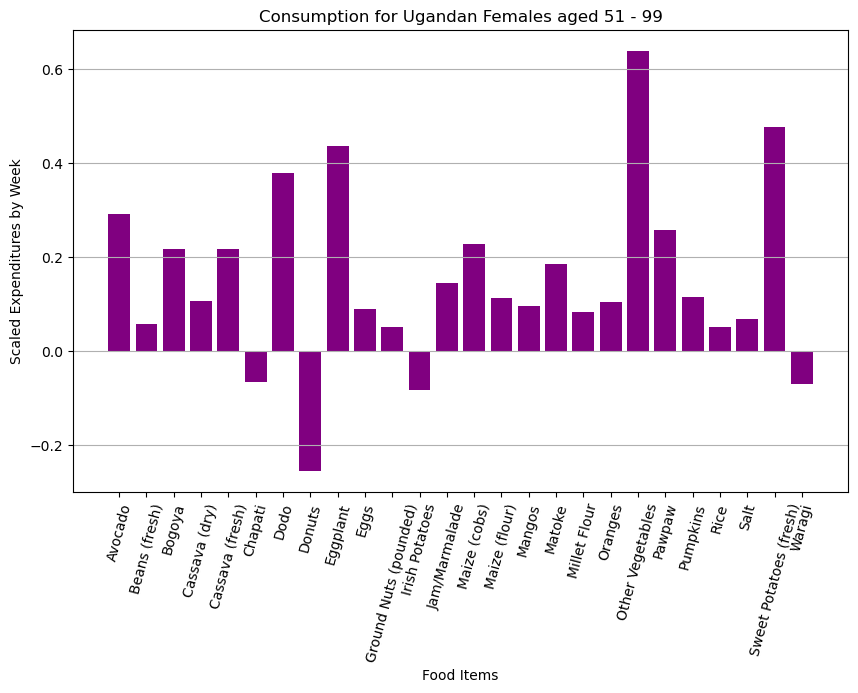

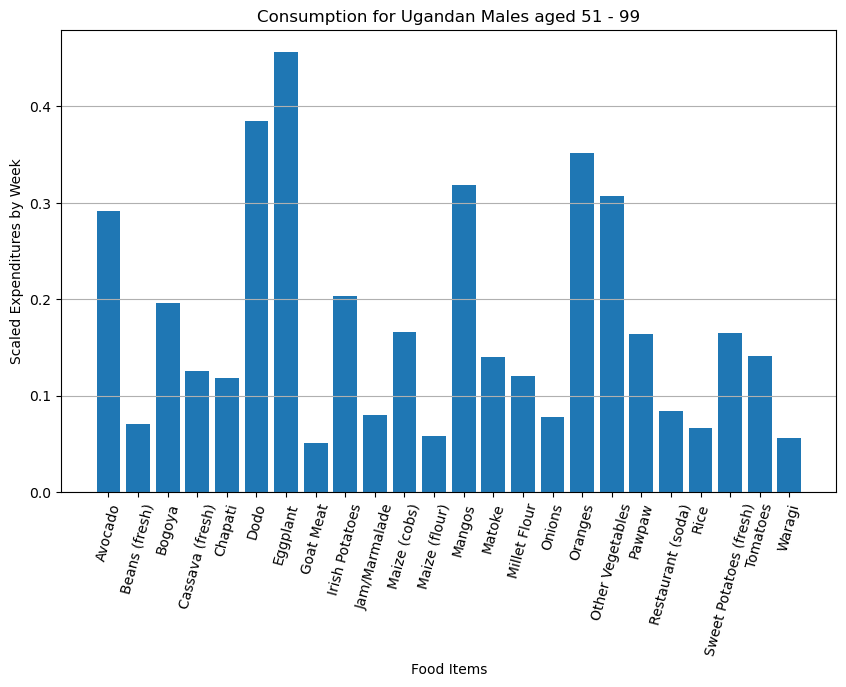

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Uganda 
plt.figure(figsize=(10, 6))

plt.title('Consumption for Ugandan Females aged 51 - 99')
plt.xlabel('Food Items')
plt.ylabel('Scaled Expenditures by Week')
plt.xticks(rotation= 75) 
plt.grid(axis='y')
plt.bar(consumption_df_re_uganda_f['Food'],consumption_df_re_uganda_f['Expenditure'], color='purple')
plt.show()

plt.figure(figsize=(10, 6))

plt.title('Consumption for Ugandan Males aged 51 - 99')
plt.xlabel('Food Items')
plt.ylabel('Scaled Expenditures by Week')
plt.xticks(rotation= 75) 
plt.grid(axis='y')
plt.bar(consumption_df_re_uganda_m['Food'], consumption_df_re_uganda_m['Expenditure'])
plt.show()


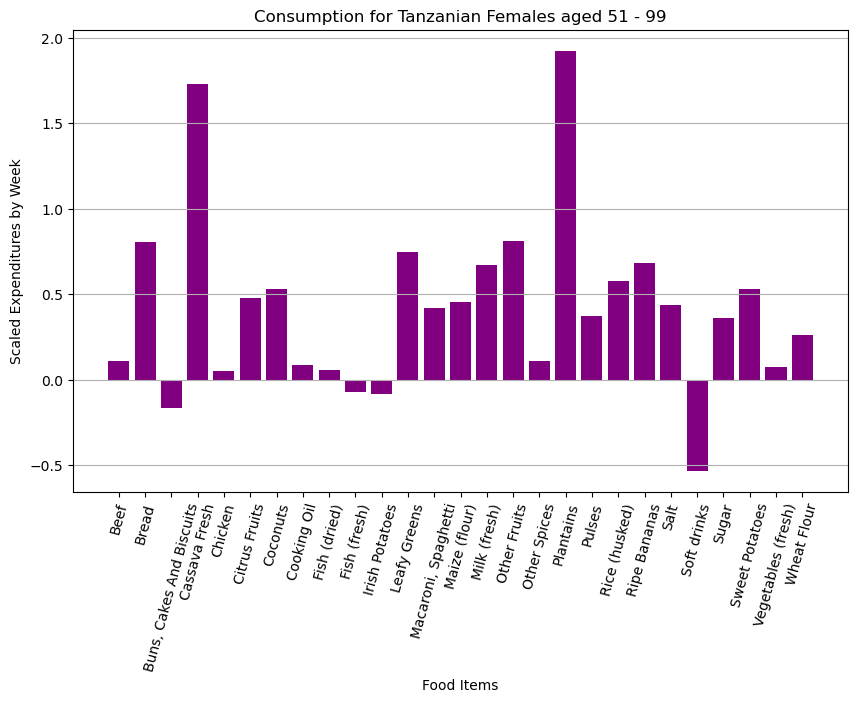

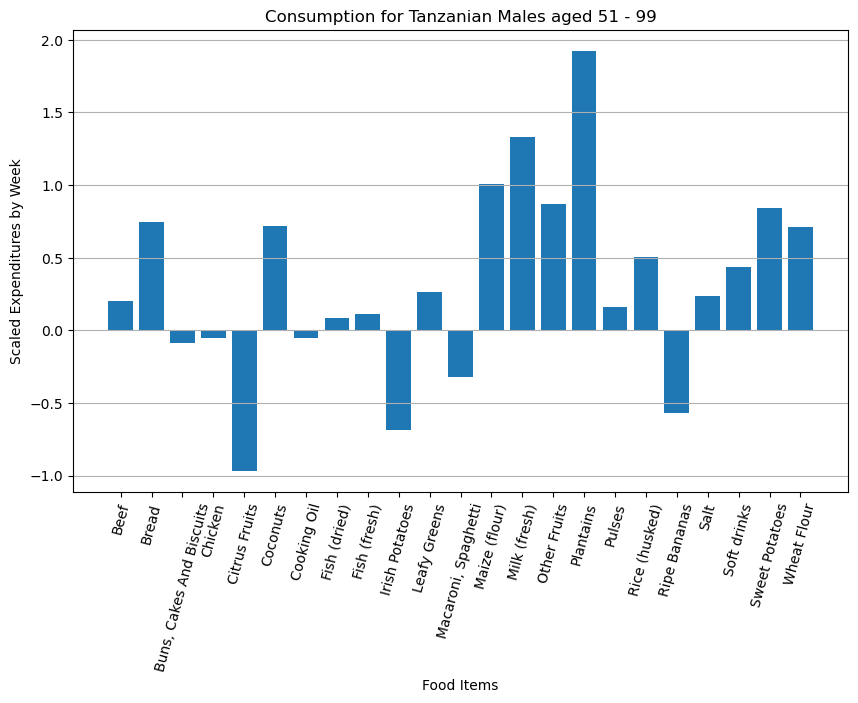

In [61]:
# Tanzania
plt.figure(figsize=(10, 6))

plt.title('Consumption for Tanzanian Females aged 51 - 99')
plt.xlabel('Food Items')
plt.ylabel('Scaled Expenditures by Week')
plt.xticks(rotation= 75) 
plt.grid(axis='y')
plt.bar(consumption_df_re_tanzania_f['Food'],consumption_df_re_tanzania_f['Expenditure'], color = 'purple')
plt.show()

plt.figure(figsize=(10, 6))

plt.title('Consumption for Tanzanian Males aged 51 - 99')
plt.xlabel('Food Items')
plt.ylabel('Scaled Expenditures by Week')
plt.xticks(rotation= 75) 
plt.grid(axis='y')
plt.bar(consumption_df_re_tanzania_m['Food'], consumption_df_re_tanzania_m['Expenditure'])
plt.show()

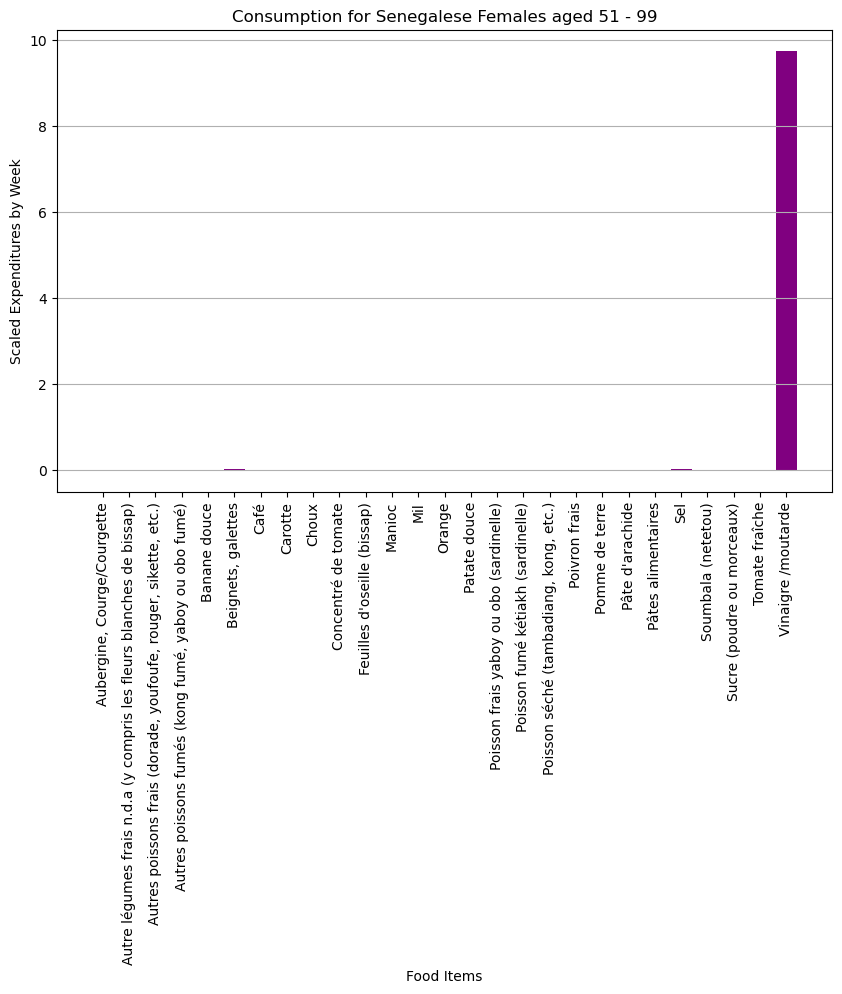

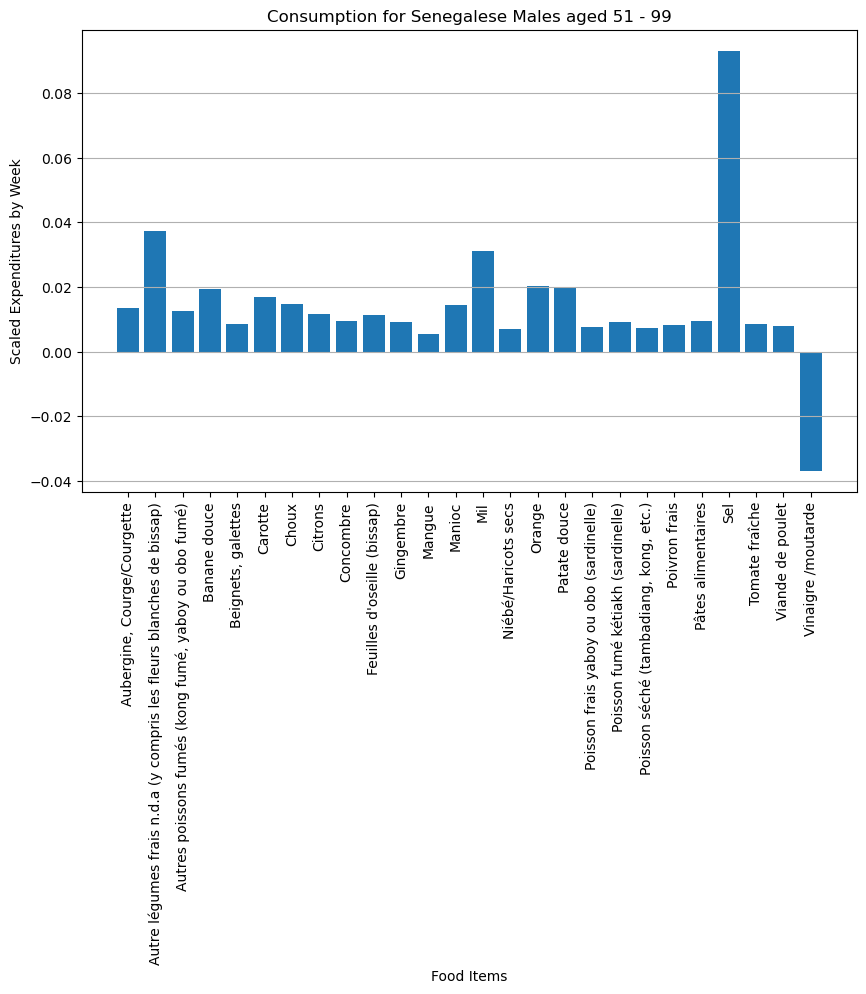

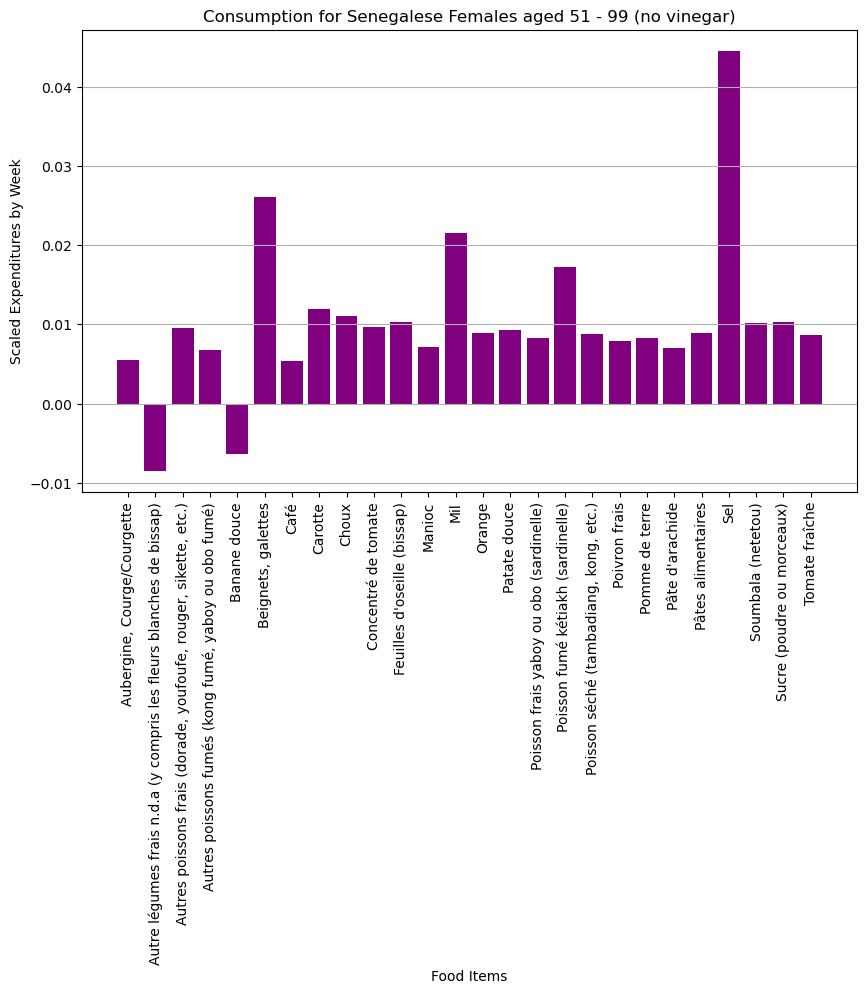

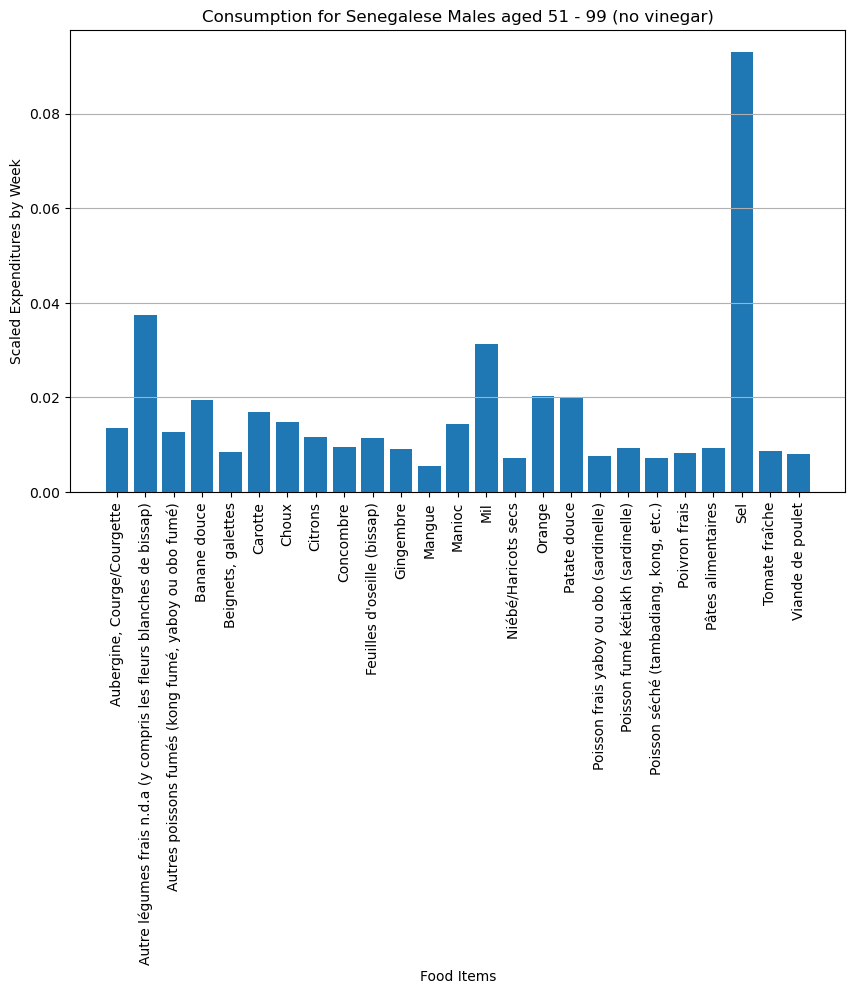

In [62]:
# Senegal with Vinegar
plt.figure(figsize=(10, 6))

plt.title('Consumption for Senegalese Females aged 51 - 99')
plt.xlabel('Food Items')
plt.ylabel('Scaled Expenditures by Week')
plt.xticks(rotation= 90) 
plt.grid(axis='y')
plt.bar(consumption_df_re_senegal_f['Food'],consumption_df_re_senegal_f['Expenditure'], color = 'purple')
plt.show()

plt.figure(figsize=(10, 6))

plt.title('Consumption for Senegalese Males aged 51 - 99')
plt.xlabel('Food Items')
plt.ylabel('Scaled Expenditures by Week')
plt.xticks(rotation= 90) 
plt.grid(axis='y')
plt.bar(consumption_df_re_senegal_m['Food'], consumption_df_re_senegal_m['Expenditure'])
plt.show()

# Senegal w/o Vinegar

plt.figure(figsize=(10, 6))

plt.title('Consumption for Senegalese Females aged 51 - 99 (no vinegar)')
plt.xlabel('Food Items')
plt.ylabel('Scaled Expenditures by Week')
plt.xticks(rotation= 90) 
plt.grid(axis='y')
plt.bar(consumption_df_re_senegal_f_no_vinegar['Food'],consumption_df_re_senegal_f_no_vinegar['Expenditure'], color = 'purple')
plt.show()

plt.figure(figsize=(10, 6))

plt.title('Consumption for Senegalese Males aged 51 - 99 (no vinegar)')
plt.xlabel('Food Items')
plt.ylabel('Scaled Expenditures by Week')
plt.xticks(rotation= 90) 
plt.grid(axis='y')
plt.bar(consumption_df_re_senegal_m_no_vinegar['Food'],consumption_df_re_senegal_m_no_vinegar['Expenditure'])
plt.show()

In [40]:
# Reference prices chosen from a particular time; average across place.
# These are prices per kilogram:
pbar_uganda = p_uganda.mean(axis=1)
pbar_uganda = pbar_uganda[result_uganda.beta.index] # Only use prices for goods we can estimate

# Replace missing prices with 1 (this is because they're best measured in expenditures)
pbar_uganda = pbar_uganda.replace(np.nan,1)

#Finally, define a function to change a single price in the vector $p$:
def my_prices(p0,j,p):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

Text(0.5, 0, 'Quantities of Avocado Demanded for Uganda')

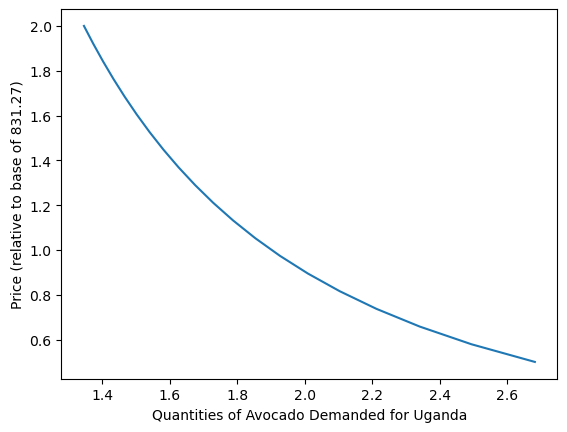

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

use = 'Avocado'  # Good we want demand curve for

# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)
myz_uganda = result_uganda.d.iloc[0]
myz_uganda['Constant']=1
myz_uganda['Males 51-99']=1
myz_uganda['Females 19-30']=0
myz_uganda['Females 51-99']=0
myz_uganda['Males 00-03']=0
myz_uganda['Males 14-18']=0
myz_uganda['Males 19-30']=0
myz_uganda['log HSize']=0
# Demand for Millet for household at median budget

plt.plot(
    [result_uganda.demands(xref_uganda, z=myz_uganda, p=my_prices(pbar_uganda[use]*s, use, pbar_uganda))[use] for s in scale],
    scale
)
plt.ylabel(f"Price (relative to base of {pbar_uganda[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded for Uganda")

Text(0.5, 0, 'Quantities of Beef Demanded for Uganda')

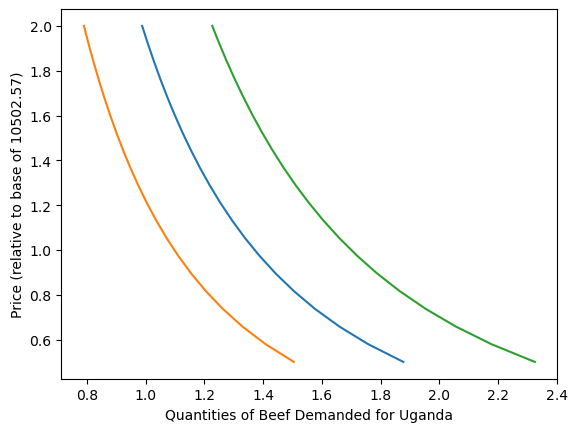

In [64]:
use = 'Beef'  # Good we want demand curve for
uganda = 'Uganda'
# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

# Demand for 'use' for household at median budget
plt.plot([result_uganda.demands(xref_uganda,my_prices(pbar_uganda[use]*s,use,pbar_uganda))[use] for s in scale],scale)

# Demand for 'use'for household at 25% percentile
plt.plot([result_uganda.demands(xbar_uganda.quantile(0.25),my_prices(pbar_uganda[use]*s,use,pbar_uganda))[use] for s in scale],scale)

# Demand for 'use' for household at 75% percentile
plt.plot([result_uganda.demands(xbar_uganda.quantile(0.75),my_prices(pbar_uganda[use]*s,use,pbar_uganda))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar_uganda[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded for {uganda}")

Text(0.5, 0, 'Quantities of Beef Demanded for Tanzania')

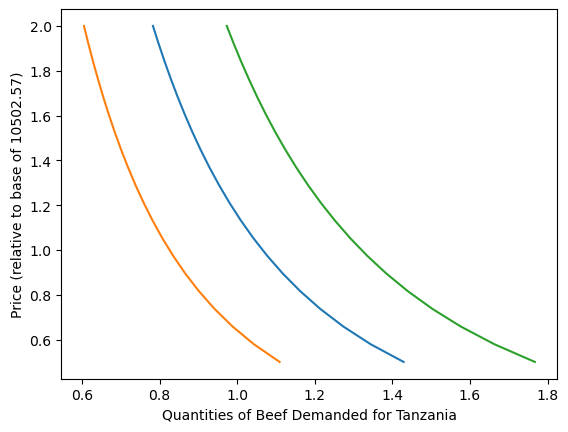

In [65]:
tanzania = 'Tanzania'
# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

# Demand for 'use' for household at median budget
plt.plot([result_tanzania.demands(xref_tanzania,my_prices(pbar_tanzania[use]*s,use,pbar_tanzania))[use] for s in scale],scale)

# Demand for 'use' for household at 25% percentile
plt.plot([result_tanzania.demands(xbar_tanzania.quantile(0.25),my_prices(pbar_tanzania[use]*s,use,pbar_tanzania))[use] for s in scale],scale)

# Demand for 'use' for household at 75% percentile
plt.plot([result_tanzania.demands(xbar_tanzania.quantile(0.75),my_prices(pbar_tanzania[use]*s,use,pbar_tanzania))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar_uganda[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded for {tanzania}")

Text(0.5, 1.0, 'Engel Curves for Tanzania')

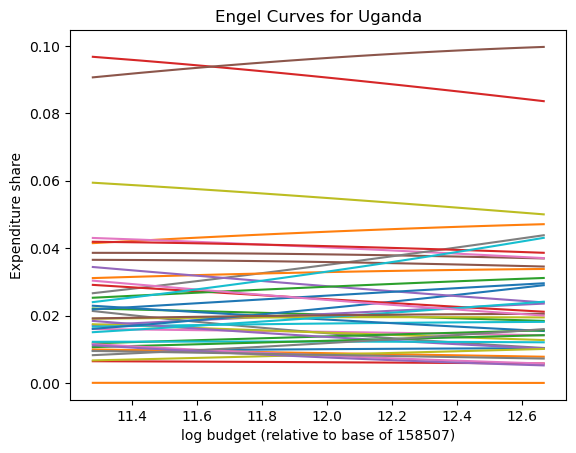

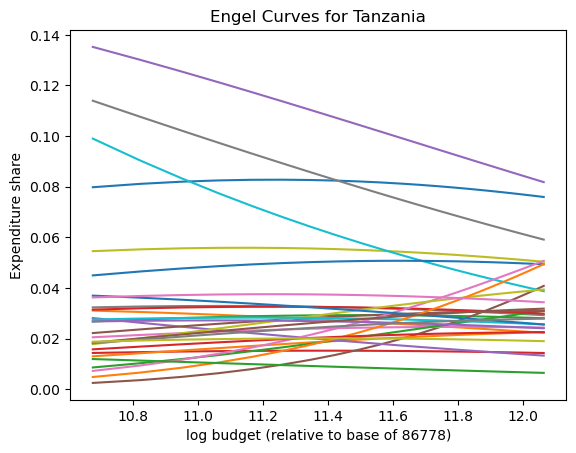

In [66]:
fig,ax = plt.subplots()
ax.plot(np.log(scale*xref_uganda),[result_uganda.expenditures(s*xref_uganda,pbar_uganda)/(s*xref_uganda) for s in scale])
ax.set_xlabel(f'log budget (relative to base of {xref_uganda:.0f})')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves for Uganda')

fig,ax = plt.subplots()
ax.plot(np.log(scale*xref_tanzania),[result_tanzania.expenditures(s*xref_tanzania,pbar_tanzania)/(s*xref_tanzania) for s in scale])
ax.set_xlabel(f'log budget (relative to base of {xref_tanzania:.0f})')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves for Tanzania')

Text(0.5, 1.0, 'Indirect Utility Function for Uganda')

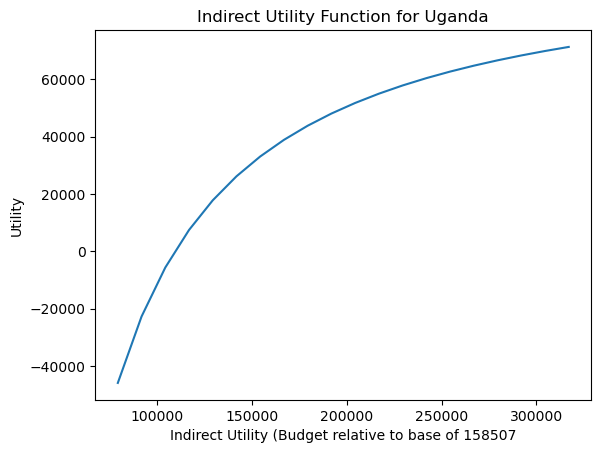

In [67]:
fig,ax = plt.subplots()

ax.plot(scale*xref_uganda,[result_uganda.indirect_utility(s*xref_uganda,pbar_uganda) for s in scale])
ax.set_xlabel(f'Indirect Utility (Budget relative to base of {xref_uganda:.0f}')
ax.set_ylabel(f'Utility')
ax.set_title('Indirect Utility Function for Uganda')

Text(0.5, 1.0, 'Indirect Utility Function for Tanzania')

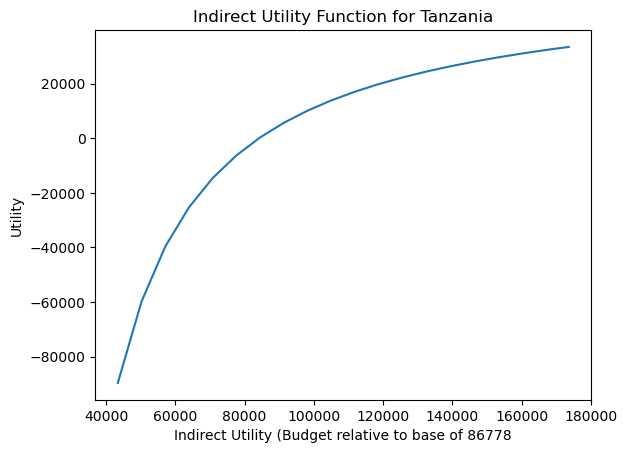

In [68]:
fig,ax = plt.subplots()

ax.plot(scale*xref_tanzania,[result_tanzania.indirect_utility(s*xref_tanzania,pbar_tanzania) for s in scale])
ax.set_xlabel(f'Indirect Utility (Budget relative to base of {xref_tanzania:.0f}')
ax.set_ylabel(f'Utility')
ax.set_title('Indirect Utility Function for Tanzania')

# Gamma Visualizations

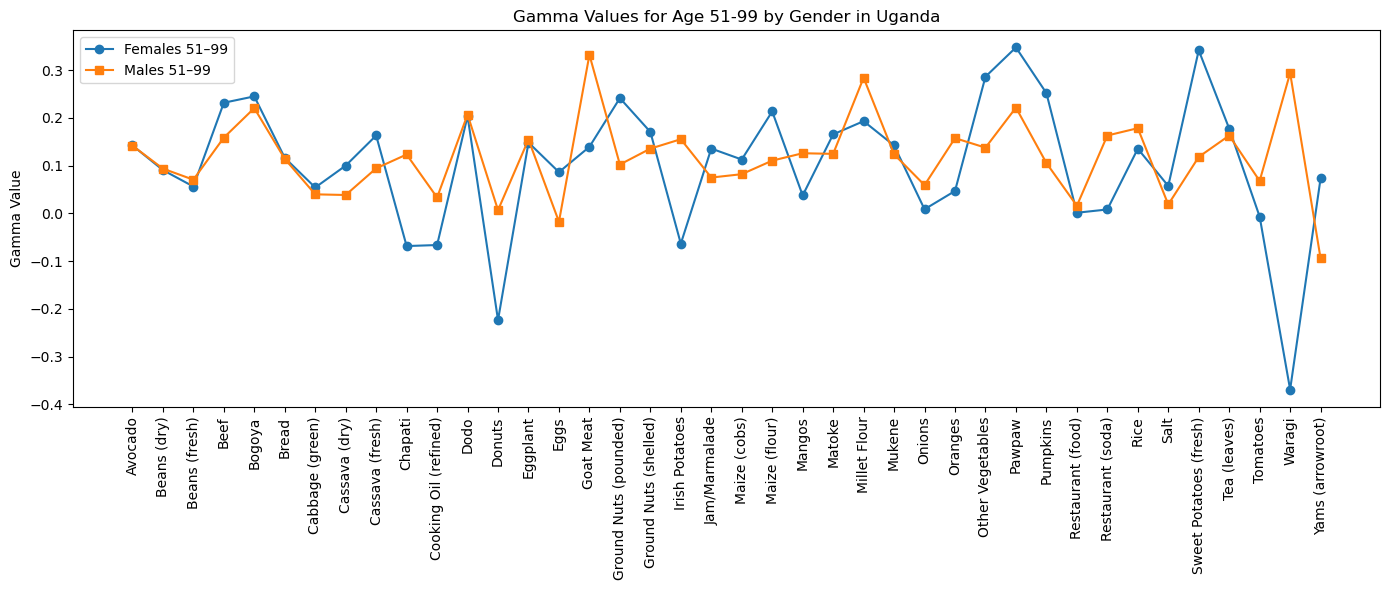

In [21]:
import matplotlib.pyplot as plot
plot.figure(figsize=(14, 6))
x = range(len(gamma_uganda))

plot.plot(x, gamma_uganda["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_uganda["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_uganda.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Uganda")
plot.legend()
plot.tight_layout()
plot.show()

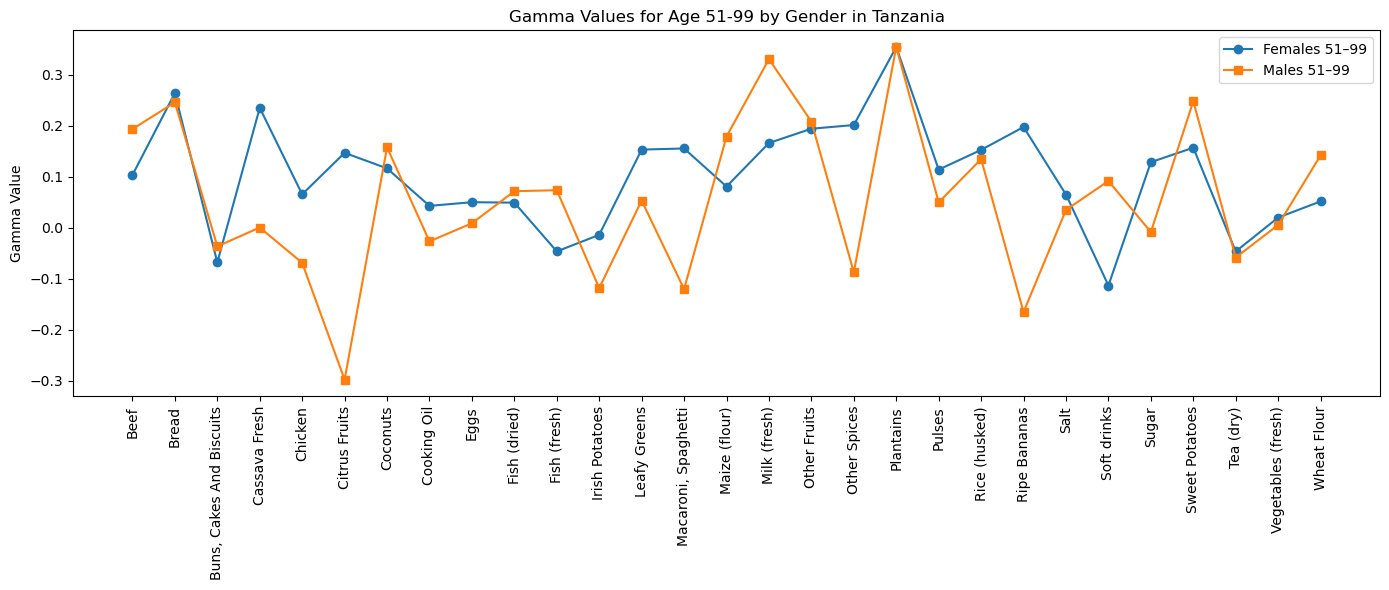

In [22]:
plot.figure(figsize=(14, 6))
x = range(len(gamma_tanzania))

plot.plot(x, gamma_tanzania["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_tanzania["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_tanzania.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Tanzania")
plot.legend()
plot.tight_layout()
plot.show()

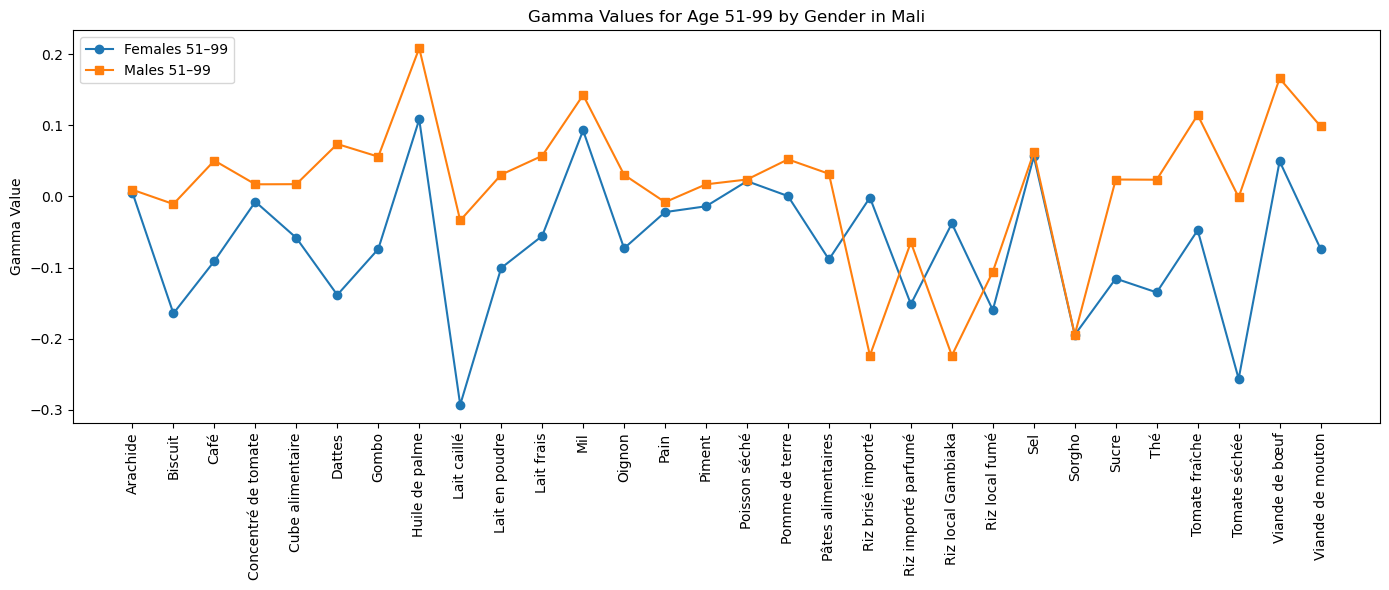

In [23]:
gamma_mali.columns = ["Females 51-99", "Males 51-99"]

plot.figure(figsize=(14, 6))
x = range(len(gamma_mali))

plot.plot(x, gamma_mali["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_mali["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_mali.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Mali")
plot.legend()
plot.tight_layout()
plot.show()

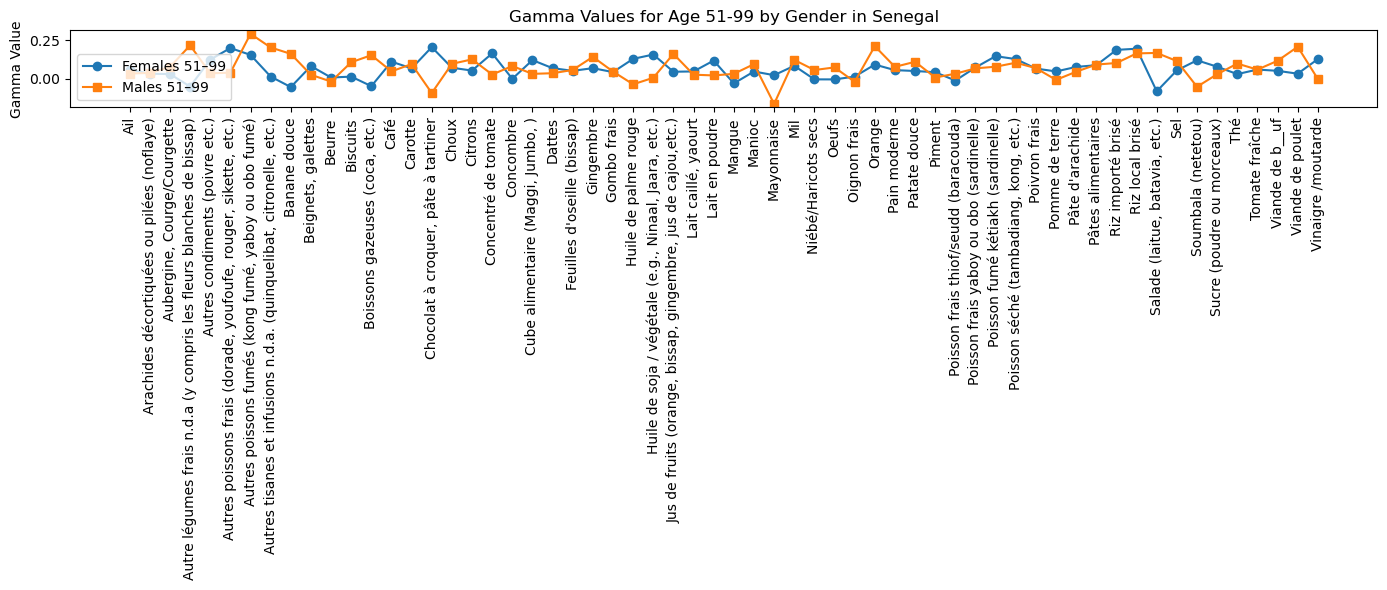

In [24]:
plot.figure(figsize=(14, 6))
x = range(len(gamma_senegal))

plot.plot(x, gamma_senegal["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_senegal["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_senegal.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Senegal")
plot.legend()
plot.tight_layout()
plot.show()

In [25]:
def sort_gammas(df, gender):
    return df.reindex(df[gender].abs().sort_values(ascending=False).index)

def plot_top_gammas(df, column, title, top_n=10):
    df_top = df[column].abs().sort_values(ascending=False).head(top_n)
    actual_values = df.loc[df_top.index, column]

    plt.figure(figsize=(8, 5))
    actual_values.plot(kind='barh', color=actual_values.apply(lambda x: 'green' if x > 0 else 'red'))
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Gamma Coefficient")
    plt.tight_layout()
    plt.show()

In [26]:
import matplotlib.pyplot as plt

gamma_sorted = {
    "senegal_f": sort_gammas(gamma_senegal, "Females 51-99"),
    "senegal_m": sort_gammas(gamma_senegal, "Males 51-99"),
    "uganda_f": sort_gammas(gamma_uganda, "Females 51-99"),
    "uganda_m": sort_gammas(gamma_uganda, "Males 51-99"),
    "tanzania_f": sort_gammas(gamma_tanzania, "Females 51-99"),
    "tanzania_m": sort_gammas(gamma_tanzania, "Males 51-99"),
    "mali_f": sort_gammas(gamma_mali, "Females 51-99"),
    "mali_m": sort_gammas(gamma_mali, "Males 51-99"),
}

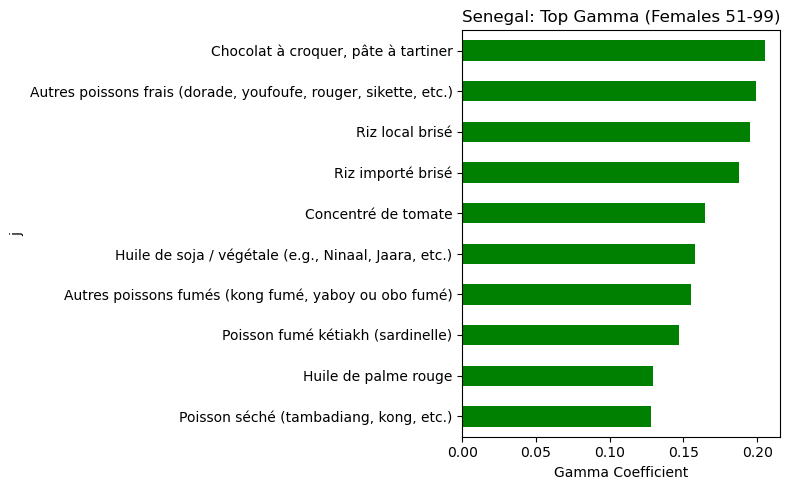

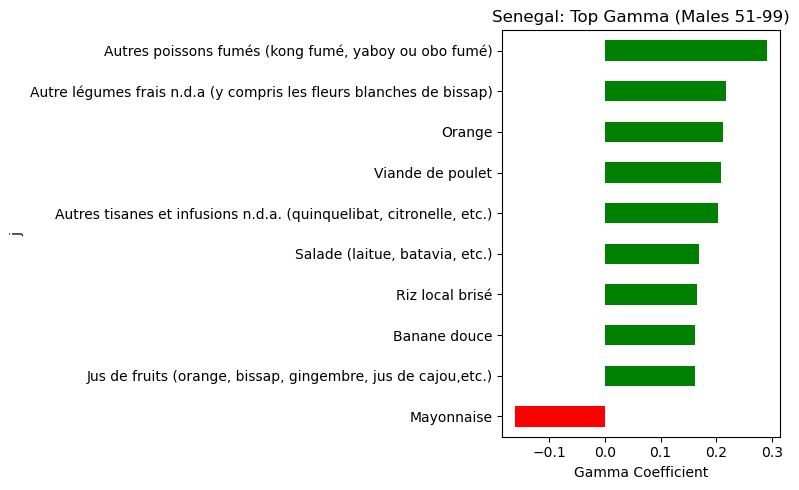

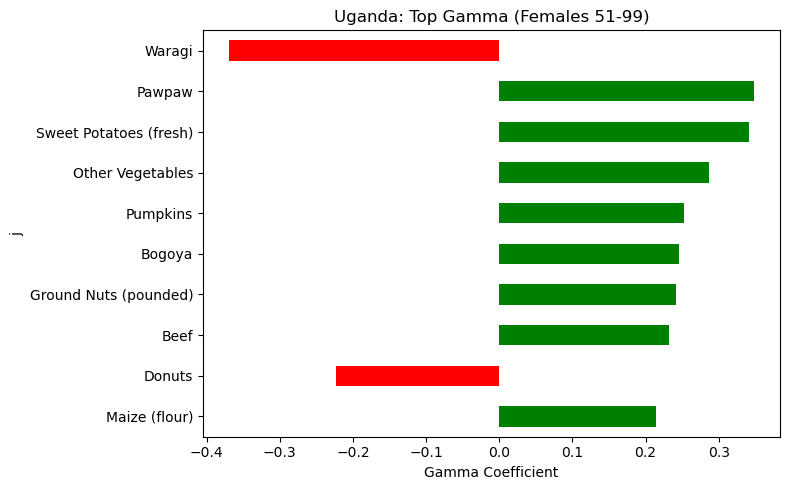

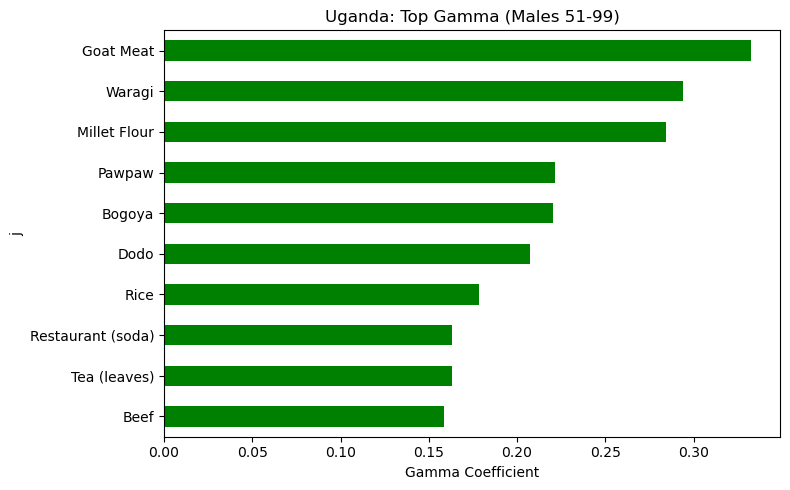

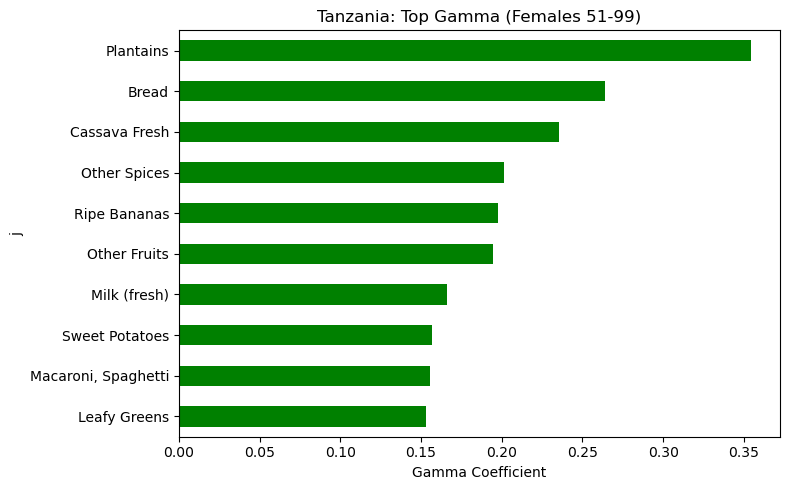

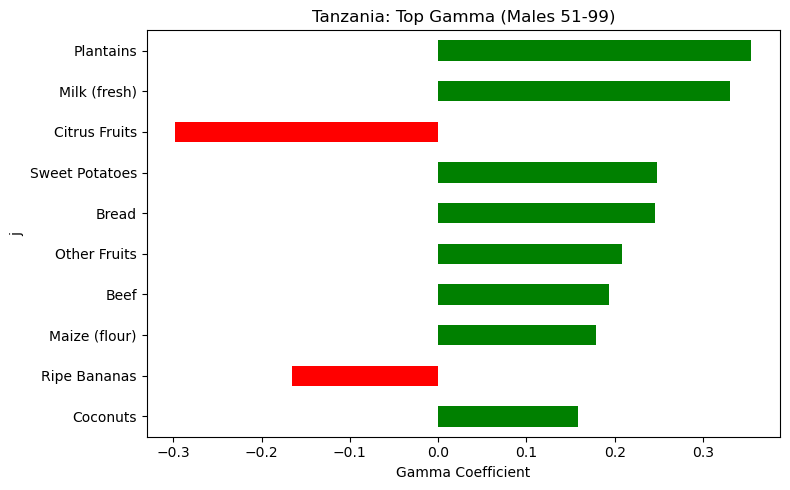

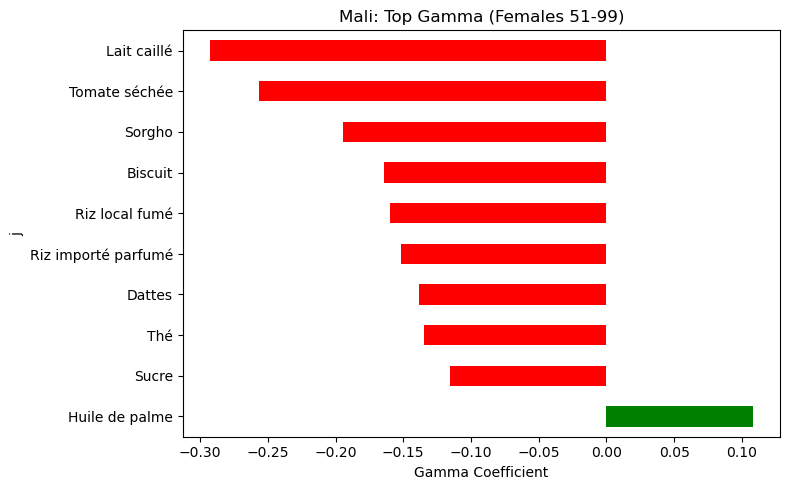

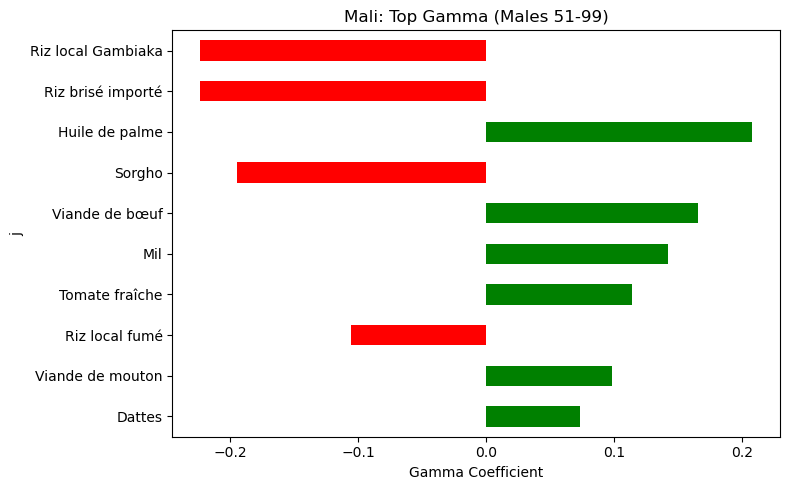

In [27]:
plot_top_gammas(gamma_sorted["senegal_f"], "Females 51-99", "Senegal: Top Gamma (Females 51-99)")
plot_top_gammas(gamma_sorted["senegal_m"], "Males 51-99", "Senegal: Top Gamma (Males 51-99)")

plot_top_gammas(gamma_sorted["uganda_f"], "Females 51-99", "Uganda: Top Gamma (Females 51-99)")
plot_top_gammas(gamma_sorted["uganda_m"], "Males 51-99", "Uganda: Top Gamma (Males 51-99)")

plot_top_gammas(gamma_sorted["tanzania_f"], "Females 51-99", "Tanzania: Top Gamma (Females 51-99)")
plot_top_gammas(gamma_sorted["tanzania_m"], "Males 51-99", "Tanzania: Top Gamma (Males 51-99)")

plot_top_gammas(gamma_sorted["mali_f"], "Females 51-99", "Mali: Top Gamma (Females 51-99)")
plot_top_gammas(gamma_sorted["mali_m"], "Males 51-99", "Mali: Top Gamma (Males 51-99)")


# Nutritional Content

In [50]:
InputFiles = {'Expenditures':('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','Expenditures (2019-20)'),
                      'Prices':('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','Prices'),
                      'HH Characteristics':('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','HH Characteristics'),
                      'FCT':('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','FCT'),
                      'RDI':('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','RDI'),}

In [51]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    df = read_sheets(key,sheet=sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

# Get expenditures...
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['i','t','m'])
x.columns.name = 'j'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['i','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# Get prices
p = get_clean_sheet(InputFiles['Prices'][0],
                    sheet=InputFiles['Prices'][1])

if 'm' not in p.columns:  # Supply "market" indicator if missing
    p['m'] = 1

p = p.set_index(['t','m'])
p.columns.name = 'j'

p = p.apply(lambda x: pd.to_numeric(x,errors='coerce'))
p = p.replace(0,np.nan)

fct = get_clean_sheet(InputFiles['FCT'][0],
                    sheet=InputFiles['FCT'][1])

fct = fct.set_index('j')
fct.columns.name = 'n'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

rdi = get_clean_sheet(InputFiles['RDI'][0],
                    sheet=InputFiles['RDI'][1])
rdi = rdi.set_index('n')
rdi.columns.name = 'k'

In [52]:
import cfe

result = cfe.Regression(y=np.log(x.stack()),d=z)

result.get_beta().sort_values(ascending=False)

result = cfe.read_pickle('foo.pickle')  # Get persistent result saved above...

xhat = result.predicted_expenditures()

# Expenditures divided by prices/kg gives quantities in kgs...
qhat = (xhat.unstack('j')/p).dropna(how='all')

# Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [53]:
use = fct.index.intersection(qhat.columns)

nutrients = qhat[use]@fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household. (Depends on dataset)

n
Energy          54394.359147
Protein          1543.135088
Fiber             719.013180
Folate          11133.452311
Calcium         17461.844887
Carbohydrate     7168.395869
Iron              423.974692
Niacin            431.775192
Riboflavin         38.594788
Thiamin            45.800022
Vitamin A        9683.206362
Vitamin B-12       60.013724
Vitamin B-6        51.591940
Vitamin C        5136.327910
Zinc              238.093310
dtype: float64

In [54]:
z = z[rdi.columns.tolist()]

# Filtering this dataset for our elderly population
z = filter_data (z, on = ["F 51+", "M 51+"])
hh_rdi = z@rdi.T

# Uganda data is per week, so make this a recommended WEEKLY intake:
hh_rwi = hh_rdi*7

In [55]:
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()
nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
i,t,m,,,,,,,,,,,,,,,
1013000201,2019-20,Central,5.134721,5.098043,4.132305,3.873524,2.226907,7.438462,7.580828,4.557005,5.250963,6.383922,1.716840,4.348662,5.115286,7.325443,4.520410
1021000108,2019-20,Central,1.048122,1.058477,0.832093,0.912693,0.517780,1.474234,1.625111,0.928337,1.126161,1.310878,0.399020,1.133644,1.124698,1.378878,0.889222
1021001309,2019-20,Central,3.122990,3.155279,2.465162,2.381645,1.332066,4.227055,4.513095,2.713522,3.274164,3.794793,1.153302,2.942955,3.160160,4.350057,2.809680
1021002509,2019-20,Central,2.628332,2.590283,2.024728,2.299285,1.555433,4.405215,4.451419,2.404728,2.657364,3.558620,0.865648,2.679623,2.744825,3.737724,2.007802
1033000504,2019-20,Central,2.135059,2.187880,1.662316,1.652309,0.899947,2.742275,3.039289,1.826416,2.288908,2.551020,0.846866,2.166556,2.180116,2.926707,1.951226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H41809-04-01,2019-20,Western,0.786891,0.909911,0.808056,0.832167,0.362691,1.462422,1.411545,0.855055,0.971062,1.133647,0.346992,0.865097,0.915416,1.278593,0.738758
H42103-04-01,2019-20,Western,1.824212,2.033254,1.842202,1.756450,0.802231,3.657142,3.335466,1.973120,2.102995,2.621748,0.680437,1.695344,1.993378,2.959693,1.616832
H42204-04-01,2019-20,Western,1.912843,2.153125,1.883507,1.939244,1.009484,4.133161,3.782366,2.092984,2.192629,2.893538,0.727848,1.981257,2.137453,3.284437,1.607055


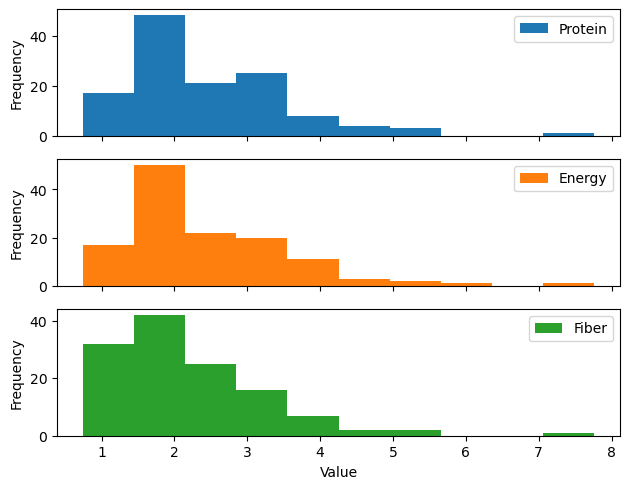

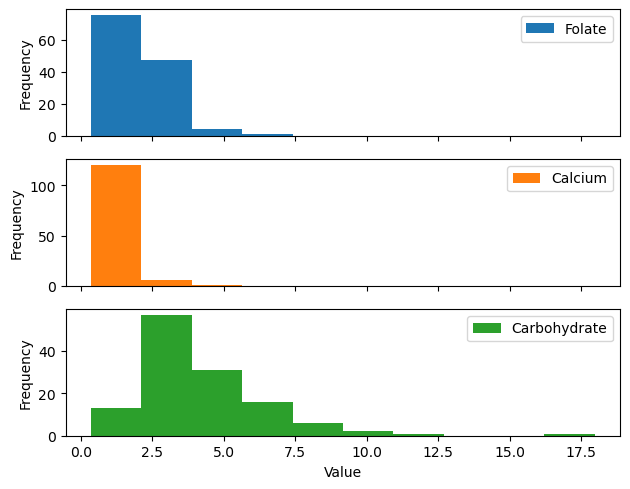

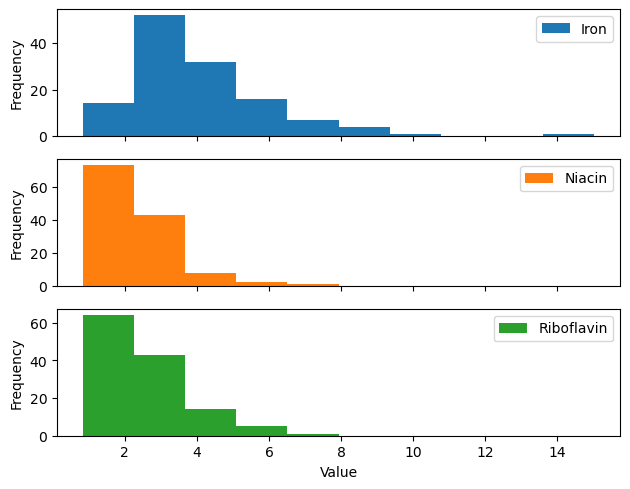

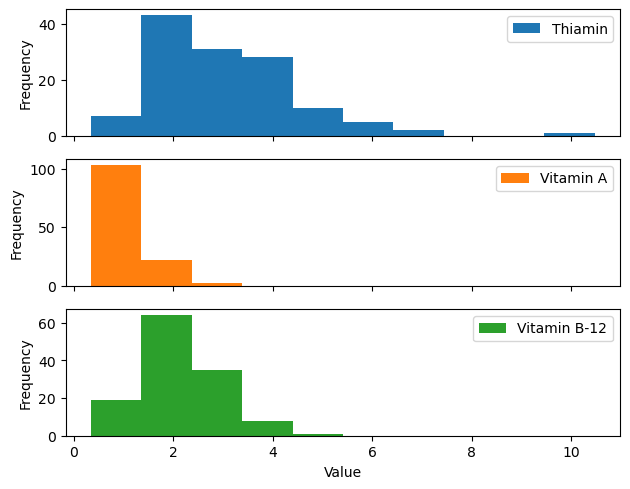

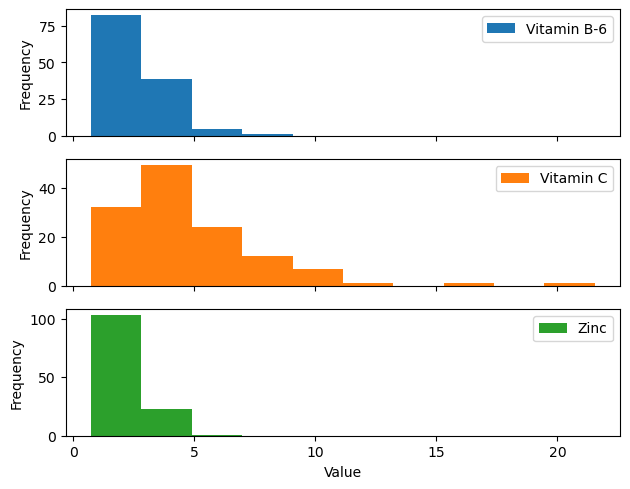

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Dividing dataset into batches to create subplots
nr_first = nutrient_ratio[['Protein', 'Energy', 'Fiber']]
nr_second = nutrient_ratio[['Folate', 'Calcium', 'Carbohydrate']]
nr_third = nutrient_ratio[['Iron', 'Niacin', 'Riboflavin']]
nr_fourth = nutrient_ratio[['Thiamin', 'Vitamin A', 'Vitamin B-12']]
nr_fifth = nutrient_ratio[['Vitamin B-6', 'Vitamin C', 'Zinc']]

nr_first.plot.hist(subplots=True)
plt.tight_layout() 
plt.xlabel('Value')

nr_second.plot.hist(subplots=True)
plt.tight_layout() 
plt.xlabel('Value')

nr_third.plot.hist(subplots=True)
plt.tight_layout() 
plt.xlabel('Value')

nr_fourth.plot.hist(subplots=True)
plt.tight_layout() 
plt.xlabel('Value')

nr_fifth.plot.hist(subplots=True)
plt.tight_layout()
plt.xlabel('Value')
plt.show()